
# Detección de Anomalías en Señales ECG

Este cuaderno realiza la detección de anomalías en señales de ECG almacenadas en archivos `.mat`.  
Los pasos incluyen:
1. **Carga de datos**
2. **Procesamiento de señales**
3. **Visualización**
4. **Detección de outliers**
5. **Exportación de resultados**


In [10]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.io import loadmat
import re

# Configuración para gráficos
# plt.style.use('seaborn-darkgrid')


# ECG signals (1000 fragments)

For research purposes, the ECG signals were obtained from the PhysioNet service (http://www.physionet.org) from the MIT-BIH Arrhythmia database. The created database with ECG signals is described below. 1) The ECG signals were from 45 patients: 19 female (age: 23-89) and 26 male (age: 32-89). 2) The ECG signals contained 17 classes: normal sinus rhythm, pacemaker rhythm, and 15 types of cardiac dysfunctions (for each of which at least 10 signal fragments were collected). 3) All ECG signals were recorded at a sampling frequency of 360 [Hz] and a gain of 200 [adu / mV]. 4) For the analysis, 1000, 10-second (3600 samples) fragments of the ECG signal (not overlapping) were randomly selected. 5) Only signals derived from one lead, the MLII, were used. 6) Data are in mat format (Matlab).

## Evaluación de clasificador usando Edge Impulse
- Usamos la base de datos: https://data.mendeley.com/datasets/7dybx7wyfn/3
- Articulo base: https://www.sciencedirect.com/science/article/pii/S0957417417306292?via%3Dihub

### Enfermedades cardiovasculares: 
Las enfermedades cardiovasculares (ECV) son un grupo de trastornos que afectan el corazón y los vasos sanguíneos, siendo una de las principales causas de morbilidad y mortalidad en todo el mundo. Algunas de las enfermedades cardiovasculares más comunes incluyen:

### Enfermedad coronaria: 
También conocida como enfermedad arterial coronaria (EAC) o enfermedad coronaria del corazón, se caracteriza por la acumulación de placa en las arterias coronarias que suministran sangre al corazón. Esto puede conducir a la angina de pecho (dolor en el pecho) o a un ataque cardíaco si se produce una obstrucción completa del flujo sanguíneo.

### Infarto de miocardio: 
También conocido como ataque cardíaco, ocurre cuando una parte del músculo cardíaco se ve privada de sangre debido a la obstrucción de una arteria coronaria, lo que lleva a la muerte del tejido cardíaco.

### Insuficiencia cardíaca: 
Es una afección en la que el corazón no puede bombear suficiente sangre para satisfacer las necesidades del cuerpo. Puede ser causada por diversas condiciones, como hipertensión, enfermedad coronaria, enfermedades valvulares o miocardiopatías.

### Hipertensión arterial: 
Se refiere a la presión arterial alta, lo que significa que la fuerza ejercida por la sangre contra las paredes de las arterias es mayor de lo normal. Con el tiempo, la hipertensión puede dañar los vasos sanguíneos y aumentar el riesgo de otras enfermedades cardiovasculares.

### Accidente cerebrovascular: 
También conocido como ictus o apoplejía, ocurre cuando se interrumpe el flujo sanguíneo al cerebro debido a un coágulo o una ruptura de un vaso sanguíneo. Puede ser isquémico (por un coágulo) o hemorrágico (por la ruptura de un vaso).

### Arritmias cardíacas: 
Son trastornos del ritmo cardíaco, donde el corazón puede latir demasiado rápido (taquicardia), demasiado lento (bradicardia) o de forma irregular.

### Enfermedades valvulares: 
Implican un mal funcionamiento de las válvulas cardíacas, que pueden estar estrechas (estenosis) o tener fugas (insuficiencia), lo que afecta el flujo sanguíneo normal.

### Cardiopatías congénitas: 
Son anomalías en la estructura del corazón presentes desde el nacimiento y pueden afectar su funcionamiento.

Los factores de riesgo para desarrollar enfermedades cardiovasculares incluyen la hipertensión, el colesterol alto, la diabetes, el tabaquismo, la obesidad, la falta de actividad física, la dieta poco saludable y la predisposición genética. La prevención y el tratamiento de las enfermedades cardiovasculares implican cambios en el estilo de vida, medicamentos, procedimientos médicos y, en algunos casos, cirugía. Es fundamental llevar un estilo de vida saludable, controlar los factores de riesgo y consultar a un profesional de la salud regularmente para mantener el corazón y los vasos sanguíneos en buen estado.

## Solucion planteada:
Clasificador inferido en microcontrolador como wearable para pacientes hospitalizados con alguna enfermedad cardiovascular(ECV). El sistema permitirá generar alarmas cuando encuentre una anomalia asociada a una ECV.

Fuente: https://www.kaggle.com/datasets/moisesstevend/ecg-signals-1000-fragments?select=MLII

## Descarga de información

In [2]:
# # Descarga de datos
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("moisesstevend/ecg-signals-1000-fragments")

# print("Path to dataset files:", path)

100%|██████████| 3.79M/3.79M [00:02<00:00, 1.97MB/s]

Extracting files...


Path to dataset files: C:\Users\frany\.cache\kagglehub\datasets\moisesstevend\ecg-signals-1000-fragments\versions\1


## 1. Carga de Datos

In [4]:

# Ruta a los datos
path = "./data/MLII"
dirs = glob.glob(path + "/*", recursive=True)

# Exploramos las carpetas disponibles
print("Carpetas disponibles:", dirs)

# Función para obtener el nombre de la carpeta
def get_name_dir(_dir_text):
    pattern = r'\b(\w+)\b$'
    match = re.search(pattern, _dir_text)
    if match:
        return match.group(1)
    return None

# Ejemplo: obtener el nombre de una carpeta específica
example_dir = './data/MLII/10 VT'
print("Nombre de la carpeta:", get_name_dir(example_dir))


Carpetas disponibles: ['./data/MLII\\1 NSR', './data/MLII\\10 VT', './data/MLII\\11 IVR', './data/MLII\\12 VFL', './data/MLII\\13 Fusion', './data/MLII\\14 LBBBB', './data/MLII\\15 RBBBB', './data/MLII\\16 SDHB', './data/MLII\\17 PR', './data/MLII\\2 APB', './data/MLII\\3 AFL', './data/MLII\\4 AFIB', './data/MLII\\5 SVTA', './data/MLII\\6 WPW', './data/MLII\\7 PVC', './data/MLII\\8 Bigeminy', './data/MLII\\9 Trigeminy']
Nombre de la carpeta: VT


## 2. Procesamiento de Datos

In [5]:

# Función para obtener los archivos dentro de un directorio
def get_files_from_dir(_dir):
    return glob.glob(_dir + "/*", recursive=True)

# Ejemplo: listar archivos en la primera carpeta
files_in_dir = get_files_from_dir(dirs[0])
print("Archivos en el directorio:", files_in_dir)

# Cargamos un archivo .mat de ejemplo
mat = loadmat(files_in_dir[0])
signal = mat['val'][0]  # Extraemos la señal

# Mostramos información básica de la señal
print("Dimensiones de la señal:", signal.shape)


Archivos en el directorio: ['./data/MLII\\1 NSR\\100m (0).mat', './data/MLII\\1 NSR\\100m (1).mat', './data/MLII\\1 NSR\\100m (2).mat', './data/MLII\\1 NSR\\100m (3).mat', './data/MLII\\1 NSR\\100m (4).mat', './data/MLII\\1 NSR\\100m (5).mat', './data/MLII\\1 NSR\\100m (6).mat', './data/MLII\\1 NSR\\100m (7).mat', './data/MLII\\1 NSR\\100m (8).mat', './data/MLII\\1 NSR\\100m (9).mat', './data/MLII\\1 NSR\\101m (0).mat', './data/MLII\\1 NSR\\101m (1).mat', './data/MLII\\1 NSR\\101m (10).mat', './data/MLII\\1 NSR\\101m (2).mat', './data/MLII\\1 NSR\\101m (3).mat', './data/MLII\\1 NSR\\101m (4).mat', './data/MLII\\1 NSR\\101m (5).mat', './data/MLII\\1 NSR\\101m (6).mat', './data/MLII\\1 NSR\\101m (7).mat', './data/MLII\\1 NSR\\101m (8).mat', './data/MLII\\1 NSR\\101m (9).mat', './data/MLII\\1 NSR\\103m (0).mat', './data/MLII\\1 NSR\\103m (1).mat', './data/MLII\\1 NSR\\103m (2).mat', './data/MLII\\1 NSR\\103m (3).mat', './data/MLII\\1 NSR\\103m (4).mat', './data/MLII\\1 NSR\\103m (5).mat',

## 3. Visualización de Datos

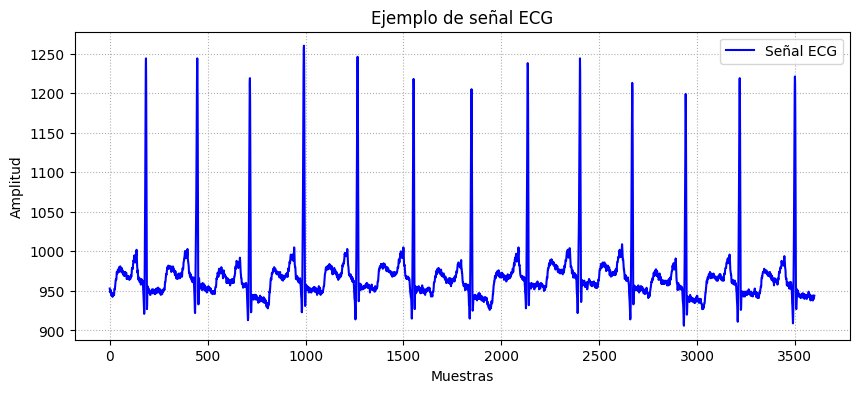

In [6]:

# Visualizamos una señal de ejemplo
plt.figure(figsize=(10, 4))
plt.plot(signal, color='blue', label='Señal ECG')
plt.title("Ejemplo de señal ECG")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(ls=":")
plt.show()


## 4. Detección de Anomalías (Outliers)

Número de outliers detectados: 87


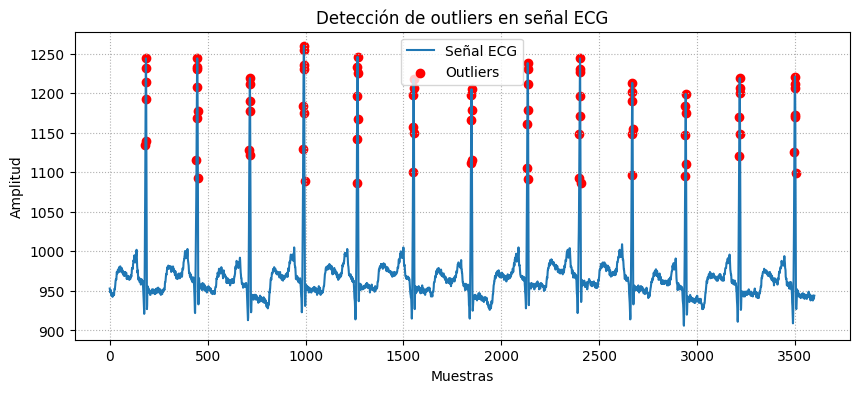

In [7]:

# Detección de outliers usando desviación estándar
mean = np.mean(signal)
std = np.std(signal)
threshold = 3  # Umbral de desviación estándar

# Identificamos los valores atípicos
outliers = np.where((signal > mean + threshold * std) | (signal < mean - threshold * std))[0]

print("Número de outliers detectados:", len(outliers))

# Visualizamos los outliers
plt.figure(figsize=(10, 4))
plt.plot(signal, label="Señal ECG")
plt.scatter(outliers, signal[outliers], color='red', label='Outliers')
plt.title("Detección de outliers en señal ECG")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(ls=":")
plt.show()


## 5. Exportación de Resultados

In [9]:

# Guardamos los índices de los outliers en un archivo CSV
outliers_data = pd.DataFrame({"Index": outliers, "Value": signal[outliers]})
outliers_data.to_csv("./data/res/outliers_detected.csv", index=False)
print("Archivo de outliers guardado como 'outliers_detected.csv'")


Archivo de outliers guardado como 'outliers_detected.csv'



## 6. Conclusión

En este cuaderno, hemos:

✅ Cargado datos de señales ECG.  
✅ Procesado las señales.  
✅ Visualizado las señales.  
✅ Detectado outliers basados en la desviación estándar.  
✅ Exportado los resultados a un archivo CSV.  

Los datos pueden usarse para entrenar modelos en **Edge Impulse** o cualquier otro sistema de análisis de señales biomédicas.
